## Simple Linear Regression 
> #### Ordinary Least Squares Approach (OLS) 


$$y_{i} = \alpha - \beta\cdot x_{i} + \varepsilon_{i}$$ 
$$\hat{y_{i}}= \hat{\alpha} - \hat{\beta}\cdot x_{i}$$ 
$$\varepsilon_{i} = y_{i} - \hat{y_{i}}$$ 
$$ \Rightarrow \min_{\hat{\alpha}, \hat{\beta}} \sum_{i=1}^{n} \left ( \varepsilon_{i} \right )^{2}$$

In [103]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
def scatter_data(X, y, title=None):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(X, y, c='dodgerblue')
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.set_title('Simple Linear Regression with Toy Data', fontsize=14)
    ax.set(xlabel="x1", ylabel="y")
    if title != None:
        ax.set_title(title, fontsize=14)

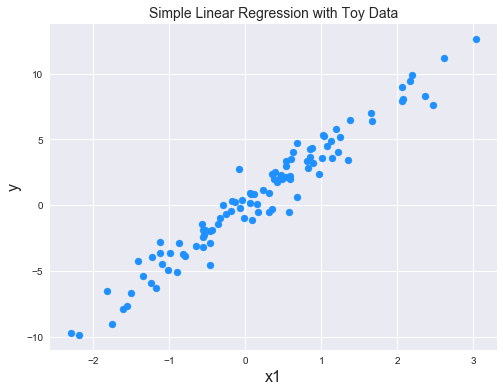

In [105]:
sns.set(style='darkgrid')
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=18)
y = y.reshape(100,1)

scatter_data(X,y)

In [106]:
X = X.reshape(100,)
y = y.reshape(100,)
n = X.shape[0]

Given our objective function $$S\left(\hat{\alpha}, \hat{\beta} \right ) = \min_{\hat{\alpha}, \hat{\beta}} \sum_{i=1}^{n} \left ( \varepsilon_{i} \right )^{2}$$ we can solve for $\alpha$ and \$\beta$ as follows:

<br>
$$S\left(\hat{\alpha}, \hat{\beta} \right ) =  \min_{\hat{\alpha}, \hat{\beta}} \sum_{i=1}^{n} \left (y_{i} - \hat{\alpha} - \hat{\beta}\cdot x_{i} \right)^2$$
<br>
$$\frac{\partial S\left(\hat{\alpha}, \hat{\beta} \right )}{\partial\alpha} = -2 \sum_{i=1}^{n} \left (y_{i} - \hat{\alpha} - \hat{\beta}\cdot x_{i} \right) = 0$$
<br>
$$\longrightarrow \boxed{\hat{\alpha }= \bar{y} - \hat{\beta} \cdot \bar{x}}$$ 
<br>
$$\frac{\partial S\left(\hat{\alpha}, \hat{\beta} \right )}{\partial\beta} = -2 \sum_{i=1}^{n} \left (y_{i} - \hat{\alpha} - \hat{\beta}\cdot x_{i} \right)\cdot x_{i} = 0$$
<br>
$$\longrightarrow \boxed{{\hat {\beta }}={\frac {\sum {x_{i}y_{i}}-{\frac {1}{n}}\sum {x_{i}}\sum {y_{i}}} {\sum {x_{i}^{2}}-{\frac {1}{n}}(\sum {x_{i}})^{2}}} = {\frac {\operatorname {Cov} [x,y]}{\operatorname {Var} [x]}}}$$

In [107]:
beta = ((np.sum(X*y)) - ((np.sum(X)*np.sum(y))/n)) / ((np.sum(X**2)) - (((np.sum(X))**2)/n))
alpha = np.sum(y - beta*X)/n

In [108]:
print("alpha: {:.4f} beta: {:.4f}".format(alpha, beta))

alpha: -0.0605 beta: 4.1123


## scikit-learn Implementation (OLS) 

In [109]:
X = X.reshape(-1,1)
lr = LinearRegression().fit(X,y)
print("intercept_: {:.4f} coef_: {:.4f}".format(lr.intercept_, lr.coef_[0]))

intercept_: -0.0605 coef_: 4.1123


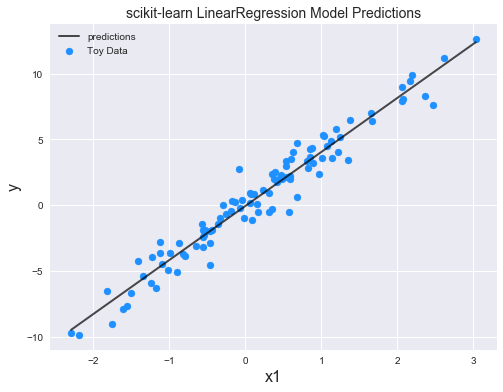

In [110]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X,y, c='dodgerblue', label="Toy Data")
x = np.linspace(X.min(), X.max(), num=X.shape[0])
lr_pred = lr.intercept_ + lr.coef_*x
ax.plot(x, lr_pred, c='black', linewidth=2, label='predictions', alpha=0.7)
ax.set(xlabel="x1", ylabel="y") 
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.set_title("scikit-learn LinearRegression Model Predictions", fontsize=14)
ax.legend()

### Model Evaluation

In [111]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(y, lr.predict(X))
print("Mean Squared Error: {:.4f}".format(lr_mse))

Mean Squared Error: 1.0823


### Linear Regression using the Normal Equation 

<br> More generally, we can write a linear model in the form:

<br> $${\displaystyle y_{i}=\beta _{1}x_{i1}+\beta _{2}x_{i2}+\ldots +\beta _{k}x_{ik}+\varepsilon _{i},}$$

<br>
This can also be expressed in matrix form as:

$${\displaystyle y=X\beta +\varepsilon \,}$$


where


<br>  
\begin{gather*}
X = 
\begin{bmatrix}
X_{11} & X_{12} & \ldots & X_{1k} \\ 
X_{21} & X_{22} & \ldots & X_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
X_{n1} & X_{n2} & \ldots & X_{nk}
\end{bmatrix}, &
y = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}, &
\beta = 
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{bmatrix}
&& \text {where $X_{i1}$ = 1 so $k$ = number of regressors + 1} 
\end{gather*}


<br> Then we can find $\beta$ by solving the following quadratic minimization problem:

<br>
$${{\hat{\beta }}={\underset {\beta}{\operatorname {arg\,min} }}\,S({\beta})}$$

<br>
$${S({\beta})=\sum _{i=1}^{n}{\bigl |}y_{i}-\sum _{j=1}^{k}X_{ij}\beta _{j}{\bigr |}^{2}={\bigl \|} {y} - {X} {\beta}{\bigr \|}^{2}.}$$

<br>
$${{\hat{\beta}} =({X} ^{\rm {T}}{X} )^{-1}{X} ^{\rm {T}}{y}}$$

In [112]:
X_ = np.c_[np.ones(X.shape), X]
X_.shape 

(100, 2)

In [113]:
beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T.dot(y))
beta

array([-0.0605151 ,  4.11231627])

###  Making Predictions using Normal Equation 

In [114]:
X_test = np.array([[-1.1],[1.4], [-0.03], [2.7]])
X_test_ = np.c_[np.ones(X_test.shape[0]), X_test] 
y_pred = X_test_.dot(beta)
y_pred

array([-4.584063  ,  5.69672767, -0.18388459, 11.04273882])

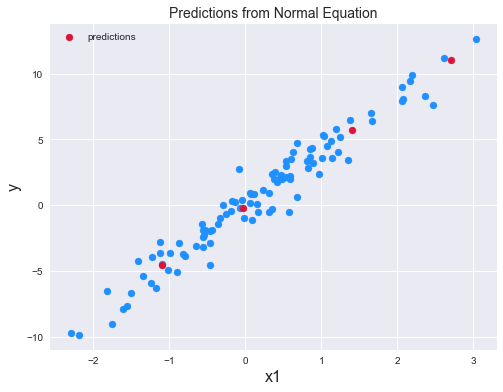

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, c='dodgerblue')
ax.scatter(X_test, y_pred, c='crimson', label='predictions')
ax.set(xlabel="x1", ylabel="y") 
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.set_title("Predictions from Normal Equation", fontsize=14)
ax.legend()

##  Simple Linear Regression 
> ####  Gradient Descent Approach (Batch GD) 

<br>
\begin{align*}
\theta = \theta - \alpha \cdot \nabla_{\theta} J(\theta)
\end{align*}
<br>
\begin{align*}
h_{\theta}(x) = \theta_{0}^{(i)}+ \theta_{1}^{(i)}x &&\textrm{(hypothesis)}
\end{align*}
<br>
\begin{align*}
J(\theta^{(i)}) = MSE = \frac{1}{n} \sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)} )^2 &&\textrm{(cost function)}
\end{align*}
<br>
$$\theta_{0}^{(i+1)} = \theta_{0}^{(i)} + \alpha\frac{\partial}{\partial\theta_{0}}J(\theta^{(i)})$$
<br>
$$\theta_{1}^{(i+1)} = \theta_{1}^{(i)} + \alpha\frac{\partial}{\partial\theta_{1}}J(\theta^{(i)})$$

#### Repeat until convergence: 

> <br>
$$\theta_{0}^{(i+1)} = \theta_{0}^{(i)} + \alpha \sum_{k=1}^{n}(\theta_{0}^{(i)} + \theta_{1}^{(i)}x_{k} - y_{k})$$
$$\theta_{1}^{(i+1)} = \theta_{1}^{(i)} + \alpha \sum_{k=1}^{n}(\theta_{0}^{(i)} + \theta_{1}^{(i)}x_{k} - y_{k})x_{k}$$

In [121]:
# function for scattering data and model with initialized paramters
def initial_scatter():
    fig, ax = plt.subplots(figsize=(10,8))
    y_pred = X_.dot(theta)
    ax.scatter(X, y, c='dodgerblue')
    y_pred = x*theta[1] + theta[0]
    ax.plot(x, y_pred, c='red', linestyle=(10, (5,5)))
    ax.set(xlabel='x1', ylabel='y')
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.axis([-3, 4, -15, 15])
    return ax

Converged at iteration: 39!
theta0: -0.0601, theta1: 4.1121
J(theta): 1.0823


Text(0.5, 1.0, 'Batch Gradient Descent')

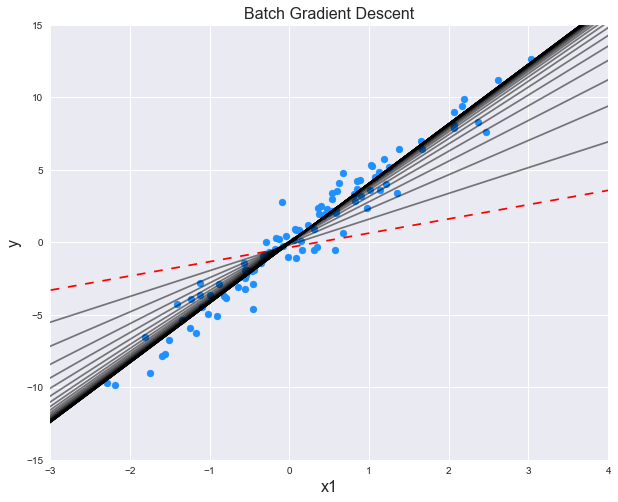

In [122]:
rng = np.random.RandomState(32) # seeding a prng for reproducible results
y = y.reshape(100,1) 
alpha = 0.1 # learning rate
num_iterations = 100
bgd_path = []
h = 0.01 
x = np.arange(X.min() - 2, X.max() + 2, step=h)
theta = rng.randn(2,1) # random initialization of the parameters
cost = []
gradients = 1

ax = initial_scatter()

for iteration in range(num_iterations):
    if np.all(abs(gradients) < 0.001) != True:
        gradients = 2/n * X_.T.dot(X_.dot(theta) - y)
        cost.append(((X_.dot(theta) - y)**2).sum()/n)
        theta = theta - alpha * gradients
        bgd_path.append(theta)
        y_pred = x*theta[1] + theta[0]
        ax.plot(x, y_pred, c='k', alpha=0.5)
    else:
        ax.plot(x, y_pred, c='k', linewidth=2)
        print("Converged at iteration: {}!".format(iteration))
        print("theta0: {:.4f}, theta1: {:.4f}".format(theta[0][0], theta[1][0]))
        print("J(theta): {:.4f}".format(cost[-1]))
        break
        
ax.set_title('Batch Gradient Descent', fontsize=16)

## Convergence Path of GD

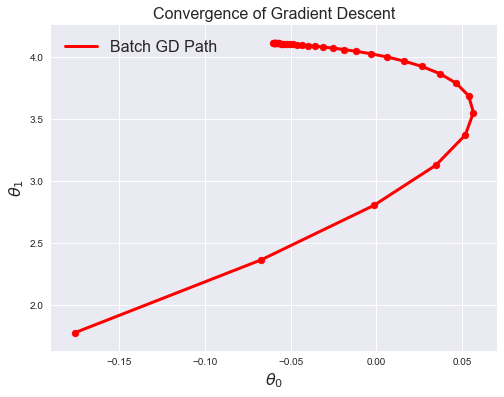

In [123]:
theta0 = [thetas[0] for thetas in bgd_path]
theta1 = [thetas[1] for thetas in bgd_path]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(theta0, theta1, c='r', linewidth=3, label="Batch GD Path")
ax.scatter(theta0, theta1, c='r')
ax.set_xlabel(r"$\theta_{0}$", fontsize=16)
ax.set_ylabel(r"$\theta_{1}$", fontsize=16)
ax.set_title('Convergence of Gradient Descent', fontsize=16)
ax.legend(loc="upper left", prop={'size': 16})

## Batch GD Model Evaluation

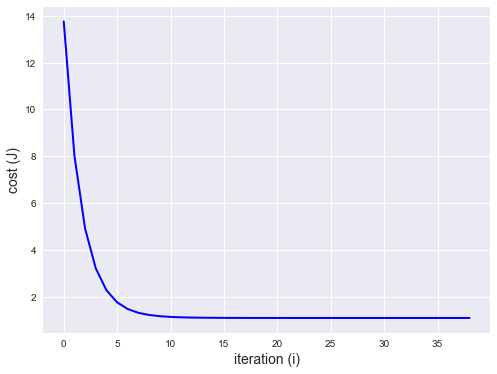

In [124]:
iters = np.arange(iteration)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(iters, cost, c='b', linewidth=2)
ax.set_xlabel("iteration (i)", fontsize=14)
ax.set_ylabel("cost (J)", fontsize=14)

bgd_converged_iter = iteration
bgd_cost = cost[:bgd_converged_iter]

##  Changing the Learning Rate ($\alpha$)

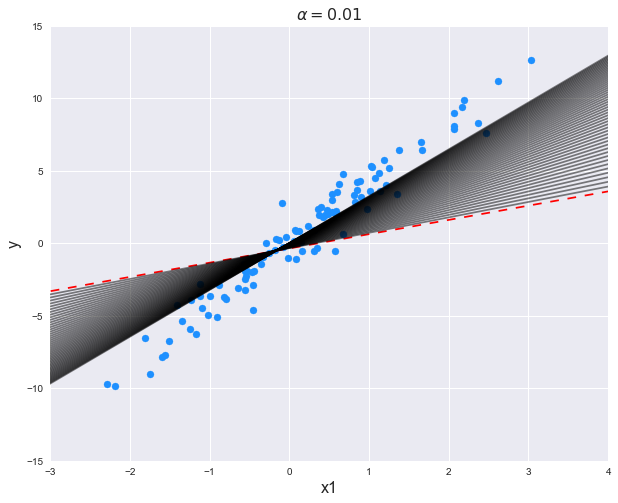

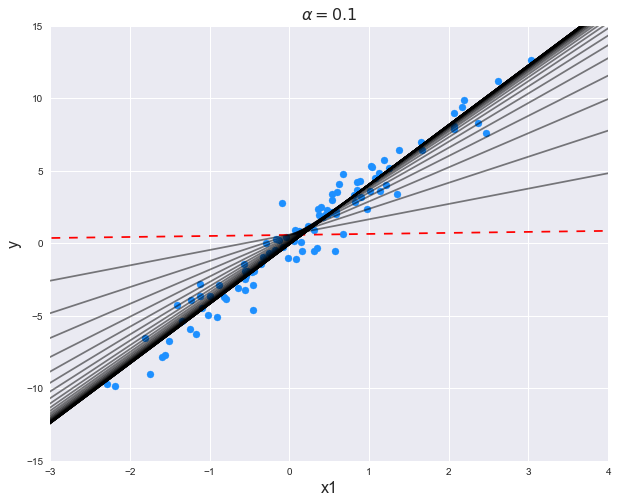

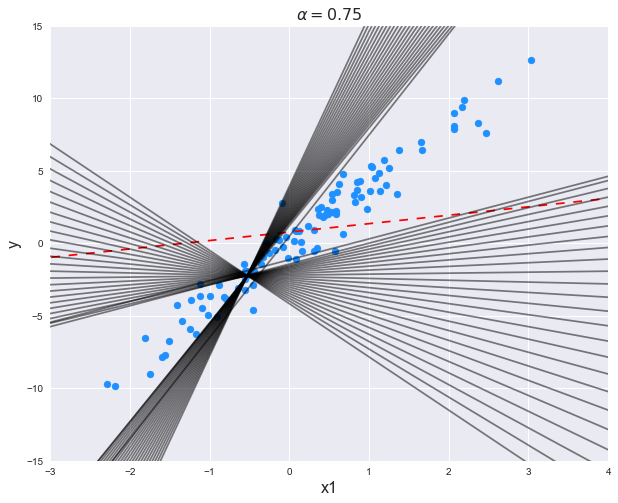

In [125]:
rng = np.random.RandomState(32)
alphas = [0.01, 0.1, 0.75]
num_iters = 50

for alpha in alphas:
    theta = rng.randn(2,1) # random initialization of the parameters
    cost = []
    gradients = 1

    ax = initial_scatter()

    for iteration in range(num_iters):
        if np.all(abs(gradients) < 0.001) != True:
            gradients = 2/n * X_.T.dot(X_.dot(theta) - y)
            cost.append(((X_.dot(theta) - y)**2).sum()/n)
            theta = theta - alpha * gradients
            y_pred = x*theta[1] + theta[0]
            ax.plot(x, y_pred, c='k', alpha=0.5)
        else:
            ax.plot(x, y_pred, c='k', linewidth=2)
            break
            
    ax.set_title(r"$\alpha = {}$".format(alpha), fontsize=16)